In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
anime = pd.read_csv('/content/drive/My Drive/anime_project/anime.csv')
#synopsis = pd.read_csv('Anime_Dataset/archive/anime_with_synopsis.csv')
rating = pd.read_csv('/content/drive/My Drive/anime_project/rating_complete.csv')

## Anime Data Set EDA

In [7]:
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


### From My Anime List
How are MyAnimeList scores calculated?
All scores given in the database are calculated as a weighted score.

Weighted Score = (v / (v + m)) * S + (m / (v + m)) * C
S = Average score for the anime/manga
v = Number users giving a score for the anime/manga †
m = Minimum number of scored users required to get a calculated score
C = The mean score across the entire Anime/Manga database

† Note that v does not correspond to the "number of scored users" as seen on the database page. Scores from users who have not viewed 1/5 of the series upon its completion are not included. Scores given from illegitimate accounts created to sway votes are also not included in the scoring algorithm.

Not Yet Aired entries have no score and will display N/A. Entries that do not meet the minimum number of scored users will also not display a calculated score.

Top Anime/Manga Rankings
The "Top Upcoming" and "Most Popular" rankings are ordered by the number of users who have added the entry to their list. All other Top Anime and Top Manga rankings are ordered by weighted score, as calculated above. Please note that while R18+ entries calculate a weighted score, they are excluded from the rankings. Music Videos are also excluded from Top Anime.

In [8]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [9]:
# Look at what kind of values are in the first 10 columns
anime.iloc[:5, :10]

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004


In [10]:
# Look at what kind of values are in the next 10 columns
anime.iloc[:5, 10:20]

,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites
0,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971
1,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174
2,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944
3,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587
4,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18


In [11]:
# Look at what kind of values are in the last set of columns
anime.iloc[:5, 20:]

,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


__Insights:__
1. Looking at info it seems that there are no null values in any of the columns; however, many columns that should be numerical are showing up as objects which makes me wonder if there are null values written as a strings. I should look to see if there are null values.
2. The numerical columns should be converted from object to numerical data types
2. 'Aired' should be converted to datetime
3. 'Duration' should be converted to numerical (in minutes)

In [12]:
# Let's look at the values for the score column
anime.Score.value_counts()

Unknown    5141
6.48         74
6.3          72
6.31         72
6.52         71
           ... 
3.19          1
4.2           1
4.35          1
3.32          1
4.06          1
Name: Score, Length: 533, dtype: int64

__Insights:__ Right away I see that 'Unknown' is a value. This can be converted to NaN and then the column should be able to be converted to int64 data types.

In [13]:
# Replace 'Unknown' values with NaN
for col in anime.columns:
    anime[col] = anime[col].replace('Unknown', np.nan)
anime.Score.value_counts()

6.48    74
6.3     72
6.31    72
6.52    71
6.45    70
        ..
3.19     1
4.2      1
4.35     1
3.32     1
4.06     1
Name: Score, Length: 532, dtype: int64

In [14]:
# Convert numerical columns from object to int64
columns_to_convert = ['Score', 'Episodes', 'Ranked', 'Score-10',
                      'Score-9', 'Score-8', 'Score-7', 'Score-6',
                      'Score-5', 'Score-4', 'Score-3', 'Score-2',
                      'Score-1']
# Convert columns to numerical data types
anime[columns_to_convert] = anime[columns_to_convert].astype(float)

In [15]:
# Convert 'aired' to datetime type.
# Because the values are in a range, I will create new columns to store the start and end dates in.
date_range = anime['Aired'].str.split(' to ', expand=True)
anime['Aired_Start'] = pd.to_datetime(date_range[0], format='%b %d, %Y', errors='coerce')
anime['Aired_End'] = pd.to_datetime(date_range[1], format='%b %d, %Y', errors='coerce')


In [16]:
# Convert 'Duration' column to numerical type
# Function to convert Duration strings to minutes
def duration_to_minutes(duration_str):
    # Skip over null values
    if not pd.isna(duration_str):
        # Use regular expressions to extract hours and minutes from strings
        hours_match = re.search(r'(\d+)\s*hr', duration_str)
        minutes_match = re.search(r'(\d+)\s*min', duration_str)

        hours = int(hours_match.group(1)) if hours_match else 0
        minutes = int(minutes_match.group(1)) if minutes_match else 0

        # Multiply hours * 60 to convert hours to minutes then return total number of minutes
        return hours * 60 + minutes
    else:
        return None

# Use function to convert 'Duration' to minutes as an int type
anime['Duration_minutes'] = anime['Duration'].apply(duration_to_minutes)

anime[['Duration','Duration_minutes']].head(10)


,Duration,Duration_minutes
0,24 min. per ep.,24.0
1,1 hr. 55 min.,115.0
2,24 min. per ep.,24.0
3,25 min. per ep.,25.0
4,23 min. per ep.,23.0
5,23 min. per ep.,23.0
6,23 min. per ep.,23.0
7,23 min. per ep.,23.0
8,27 min. per ep.,27.0
9,24 min. per ep.,24.0


In [17]:
# Check info again to see if the Dtypes are coverted as expected and which columns have null values
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   MAL_ID            17562 non-null  int64         
 1   Name              17562 non-null  object        
 2   Score             12421 non-null  float64       
 3   Genres            17499 non-null  object        
 4   English name      6997 non-null   object        
 5   Japanese name     17514 non-null  object        
 6   Type              17525 non-null  object        
 7   Episodes          17046 non-null  float64       
 8   Aired             17253 non-null  object        
 9   Premiered         4745 non-null   object        
 10  Producers         9768 non-null   object        
 11  Licensors         3946 non-null   object        
 12  Studios           10483 non-null  object        
 13  Source            13995 non-null  object        
 14  Duration          1700

__Insights:__
1. The data types are now as I expected them.
2. 'English name', 'Premiered', 'Producers', and 'Licensors' have a lot of null values. It is possible I may want to drop these columns when modeling.

Now that the datatypes and null values are easier to manage, let's explore the data some more and get an understanding of the statistics, distributions, and correlations.

In [18]:
display(anime.isnull().sum())

MAL_ID                  0
Name                    0
Score                5141
Genres                 63
English name        10565
Japanese name          48
Type                   37
Episodes              516
Aired                 309
Premiered           12817
Producers            7794
Licensors           13616
Studios              7079
Source               3567
Duration              555
Rating                688
Ranked               1762
Popularity              0
Members                 0
Favorites               0
Watching                0
Completed               0
On-Hold                 0
Dropped                 0
Plan to Watch           0
Score-10              437
Score-9              3167
Score-8              1371
Score-7               503
Score-6               511
Score-5               584
Score-4               977
Score-3              1307
Score-2              1597
Score-1               459
Aired_Start          2109
Aired_End            9809
Duration_minutes      555
dtype: int64

In [19]:
# Define a function to clean anime names
def clean_name(name):
    # Remove special characters and numbers at the end using regular expressions
    name_1 = re.sub(r'[^A-Za-z0-9\s.,\']+$', '', name)
    # Remove special characters (periods, commas, single quotes) from the end of the name
    cleaned_name = re.sub(r'[.,\']+$', '', name_1)
    return cleaned_name.strip()

# Apply the clean_name function to create a new column
anime['Cleaned_Name'] = anime['Name'].apply(clean_name)

# Sort the dataset by Popularity (ascending) and MAL_ID (ascending) to keep the most popular unique anime
sorted_anime_data = anime.sort_values(by=['Popularity', 'MAL_ID'], ascending=[True, True])

sorted_anime_data.head(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Aired_Start,Aired_End,Duration_minutes,Cleaned_Name
16761,41750,Koukaku Kidoutai: SAC_2045 2nd Season,NaN,"Action, Mecha, Military, Police, Sci-Fi, Seinen",NaN,攻殻機動隊 SAC_2045 2ndシーズン,ONA,12.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,Koukaku Kidoutai: SAC_2045 2nd Season
17548,48427,"The Sun, Moon and Stars",NaN,Music,NaN,NaN,Music,1.0,"Jan 18, 2021",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-18,NaT,3.0,"The Sun, Moon and Stars"
1393,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,デスノート,TV,37.0,"Oct 4, 2006 to Jun 27, 2007",Fall 2006,...,68577.0,28048.0,10462.0,3692.0,2256.0,3586.0,2006-10-04,2007-06-27,23.0,Death Note
7449,16498,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan,進撃の巨人,TV,25.0,"Apr 7, 2013 to Sep 29, 2013",Spring 2013,...,70768.0,31141.0,11805.0,4637.0,2707.0,4939.0,2013-04-07,2013-09-29,24.0,Shingeki no Kyojin
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64.0,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,...,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0,2009-04-05,2010-07-04,24.0,Fullmetal Alchemist: Brotherhood


In [20]:
sorted_anime_data.shape

(17562, 39)

In [21]:
# Drop duplicates based on the Cleaned_Name column and keep the first occurrence (most popular)
unique_anime_data = sorted_anime_data.drop_duplicates(subset='Cleaned_Name', keep='first')
unique_anime_data.head(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Aired_Start,Aired_End,Duration_minutes,Cleaned_Name
16761,41750,Koukaku Kidoutai: SAC_2045 2nd Season,NaN,"Action, Mecha, Military, Police, Sci-Fi, Seinen",NaN,攻殻機動隊 SAC_2045 2ndシーズン,ONA,12.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,Koukaku Kidoutai: SAC_2045 2nd Season
17548,48427,"The Sun, Moon and Stars",NaN,Music,NaN,NaN,Music,1.0,"Jan 18, 2021",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-18,NaT,3.0,"The Sun, Moon and Stars"
1393,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,デスノート,TV,37.0,"Oct 4, 2006 to Jun 27, 2007",Fall 2006,...,68577.0,28048.0,10462.0,3692.0,2256.0,3586.0,2006-10-04,2007-06-27,23.0,Death Note
7449,16498,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan,進撃の巨人,TV,25.0,"Apr 7, 2013 to Sep 29, 2013",Spring 2013,...,70768.0,31141.0,11805.0,4637.0,2707.0,4939.0,2013-04-07,2013-09-29,24.0,Shingeki no Kyojin
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64.0,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,...,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0,2009-04-05,2010-07-04,24.0,Fullmetal Alchemist: Brotherhood


In [22]:
unique_anime_data.shape

(17514, 39)

In [23]:
# Filter out rows where the 'Name' column contains the word 'season'
filtered_anime_data = unique_anime_data[~unique_anime_data['Name'].str.contains('season', case=False)]
filtered_anime_data.head(5)


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Aired_Start,Aired_End,Duration_minutes,Cleaned_Name
17548,48427,"The Sun, Moon and Stars",NaN,Music,NaN,NaN,Music,1.0,"Jan 18, 2021",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-18,NaT,3.0,"The Sun, Moon and Stars"
1393,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,デスノート,TV,37.0,"Oct 4, 2006 to Jun 27, 2007",Fall 2006,...,68577.0,28048.0,10462.0,3692.0,2256.0,3586.0,2006-10-04,2007-06-27,23.0,Death Note
7449,16498,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan,進撃の巨人,TV,25.0,"Apr 7, 2013 to Sep 29, 2013",Spring 2013,...,70768.0,31141.0,11805.0,4637.0,2707.0,4939.0,2013-04-07,2013-09-29,24.0,Shingeki no Kyojin
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64.0,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,...,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0,2009-04-05,2010-07-04,24.0,Fullmetal Alchemist: Brotherhood
6614,11757,Sword Art Online,7.25,"Action, Game, Adventure, Romance, Fantasy",Sword Art Online,ソードアート・オンライン,TV,25.0,"Jul 8, 2012 to Dec 23, 2012",Summer 2012,...,188431.0,124819.0,81155.0,44204.0,25371.0,23472.0,2012-07-08,2012-12-23,23.0,Sword Art Online


In [24]:
filtered_anime_data['English name'].fillna(filtered_anime_data['Name'], inplace=True)
filtered_anime_data['English name'].head(5)




<ipython-input-24-9fa2558ef0c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_anime_data['English name'].fillna(filtered_anime_data['Name'], inplace=True)


17548            The Sun, Moon and Stars
1393                          Death Note
7449                     Attack on Titan
3971     Fullmetal Alchemist:Brotherhood
6614                    Sword Art Online
Name: English name, dtype: object

In [25]:
filtered_anime_data.drop(columns=['Name'], inplace=True)
filtered_anime_data['Name']=filtered_anime_data['English name']
filtered_anime_data.drop(columns=['English name'], inplace=True)
filtered_anime_data.head(10)

<ipython-input-25-d5adf435c294>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_anime_data.drop(columns=['Name'], inplace=True)
<ipython-input-25-d5adf435c294>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_anime_data['Name']=filtered_anime_data['English name']
<ipython-input-25-d5adf435c294>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_anime_dat

,MAL_ID,Score,Genres,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,...,Score-5,Score-4,Score-3,Score-2,Score-1,Aired_Start,Aired_End,Duration_minutes,Cleaned_Name,Name
17548,48427,NaN,Music,NaN,Music,1.0,"Jan 18, 2021",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2021-01-18,NaT,3.0,"The Sun, Moon and Stars","The Sun, Moon and Stars"
1393,1535,8.63,"Mystery, Police, Psychological, Supernatural, ...",デスノート,TV,37.0,"Oct 4, 2006 to Jun 27, 2007",Fall 2006,"VAP, Konami, Ashi Production, Nippon Televisio...",VIZ Media,...,28048.0,10462.0,3692.0,2256.0,3586.0,2006-10-04,2007-06-27,23.0,Death Note,Death Note
7449,16498,8.48,"Action, Military, Mystery, Super Power, Drama,...",進撃の巨人,TV,25.0,"Apr 7, 2013 to Sep 29, 2013",Spring 2013,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,...,31141.0,11805.0,4637.0,2707.0,4939.0,2013-04-07,2013-09-29,24.0,Shingeki no Kyojin,Attack on Titan
3971,5114,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64.0,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",...,9308.0,3222.0,1536.0,2162.0,16806.0,2009-04-05,2010-07-04,24.0,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist:Brotherhood
6614,11757,7.25,"Action, Game, Adventure, Romance, Fantasy",ソードアート・オンライン,TV,25.0,"Jul 8, 2012 to Dec 23, 2012",Summer 2012,"Aniplex, Genco, DAX Production, ASCII Media Wo...",Aniplex of America,...,124819.0,81155.0,44204.0,25371.0,23472.0,2012-07-08,2012-12-23,23.0,Sword Art Online,Sword Art Online
10451,30276,8.57,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",ワンパンマン,TV,12.0,"Oct 5, 2015 to Dec 21, 2015",Fall 2015,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,...,17873.0,5706.0,2279.0,1448.0,2733.0,2015-10-05,2015-12-21,24.0,One Punch Man,One Punch Man
11185,31964,8.11,"Action, Comedy, School, Shounen, Super Power",僕のヒーローアカデミア,TV,13.0,"Apr 3, 2016 to Jun 26, 2016",Spring 2016,"Dentsu, Mainichi Broadcasting System, Movic, T...",Funimation,...,29893.0,9015.0,3664.0,1807.0,3129.0,2016-04-03,2016-06-26,24.0,Boku no Hero Academia,My Hero Academia
8646,22319,7.81,"Action, Mystery, Horror, Psychological, Supern...",東京喰種-トーキョーグール-,TV,12.0,"Jul 4, 2014 to Sep 19, 2014",Summer 2014,"Marvelous AQL, TC Entertainment, Shueisha",Funimation,...,51649.0,24805.0,10284.0,5144.0,4794.0,2014-07-04,2014-09-19,24.0,Tokyo Ghoul,Tokyo Ghoul
10,20,7.91,"Action, Adventure, Comedy, Super Power, Martia...",ナルト,TV,220.0,"Oct 3, 2002 to Feb 8, 2007",Fall 2002,"TV Tokyo, Aniplex, Shueisha",VIZ Media,...,46886.0,15477.0,6098.0,3582.0,5310.0,2002-10-03,2007-02-08,23.0,Naruto,Naruto
5683,9253,9.11,"Thriller, Sci-Fi",STEINS;GATE,TV,24.0,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,...,11126.0,5061.0,2292.0,1678.0,5255.0,2011-04-06,2011-09-14,24.0,Steins;Gate,Steins;Gate


In [26]:
filtered_anime_data.shape

(17137, 38)

In [27]:
anime = filtered_anime_data.copy()

### Numerical Data

In [28]:
# Let's get the summary statistics for the numerical columns
anime.describe()

,MAL_ID,Score,Episodes,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Duration_minutes
count,17137.000000,12149.000000,16676.000000,15421.000000,17137.000000,1.713700e+04,17137.000000,17137.000000,1.713700e+04,17137.000000,...,14062.000000,15844.000000,16682.000000,16674.000000,16612.000000,16236.000000,15904.000000,15627.000000,16728.000000,16630.000000
mean,21193.617786,6.493748,11.411490,7941.785293,8799.963121,3.347051e+04,443.676081,2081.869989,2.133509e+04,942.874949,...,3680.587328,4637.047084,3899.213703,1936.250390,981.486937,449.827359,211.502075,127.719396,120.457317,24.699940
std,14863.538725,0.880924,47.820009,4534.287912,5039.499075,1.223573e+05,4064.886094,12973.597319,8.846202e+04,4294.602977,...,19045.097922,19918.720682,14068.300773,6424.010458,3252.883769,1746.018536,876.495664,573.350626,668.992957,25.336633
min,1.000000,1.850000,1.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5781.000000,5.910000,1.000000,4027.000000,4458.000000,3.350000e+02,0.000000,13.000000,1.130000e+02,6.000000,...,7.000000,7.000000,12.000000,16.000000,19.000000,10.000000,7.000000,5.000000,6.000000,5.000000
50%,22255.000000,6.510000,1.000000,7963.000000,8809.000000,2.022000e+03,3.000000,72.000000,8.190000e+02,45.000000,...,69.000000,89.000000,137.000000,142.000000,110.500000,50.000000,27.000000,17.000000,16.000000,23.000000
75%,35405.000000,7.120000,12.000000,11857.000000,13166.000000,1.267900e+04,30.000000,509.000000,6.330000e+03,284.000000,...,698.000000,1023.000000,1315.000000,893.500000,516.000000,210.000000,103.000000,63.000000,55.000000,28.000000
max,48492.000000,9.190000,3057.000000,15780.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,...,535252.000000,459113.000000,303813.000000,188431.000000,124819.000000,81155.000000,44204.000000,25371.000000,33750.000000,167.000000


__Insights:__
The values have different scales. When modeling, I will probably want to use a standard scaler to normalize the data.


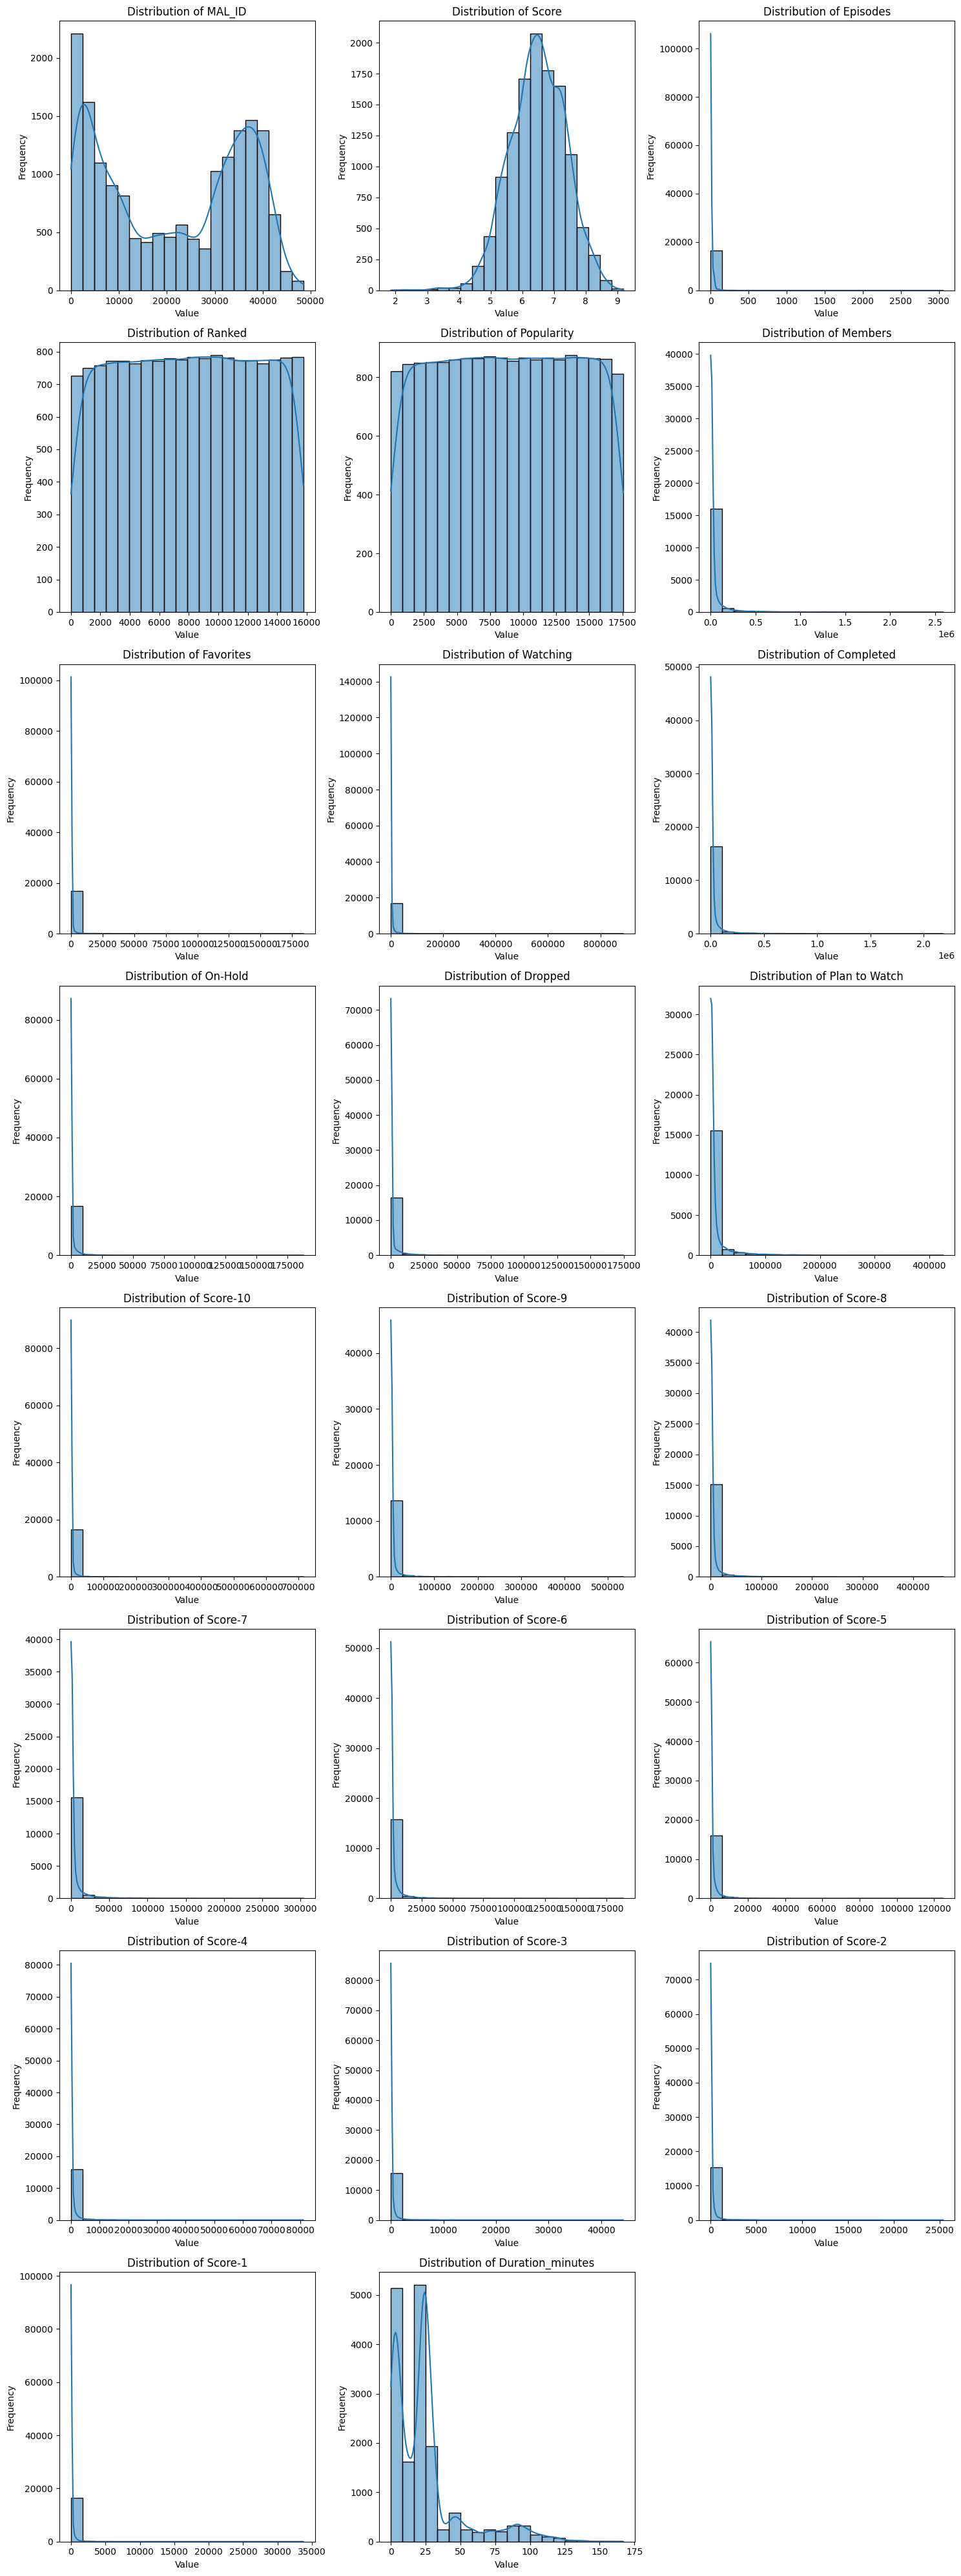

In [29]:
# plot histograms
# Get all numeric columns
numeric_columns = anime.select_dtypes(include=[np.number]).columns.tolist()

# Calculate the number of rows needed to display three graphs per row
num_cols_per_row = 3
num_rows = (len(numeric_columns) + num_cols_per_row - 1) // num_cols_per_row

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5*num_rows))

# Iterate over numeric columns and create histograms
for i, col in enumerate(numeric_columns):
    row_index = i // num_cols_per_row
    col_index = i % num_cols_per_row

    sns.histplot(anime[col], bins=20, kde=True, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Distribution of {col}')
    axes[row_index, col_index].set_xlabel('Value')
    axes[row_index, col_index].set_ylabel('Frequency')

# Remove empty subplots, if any
for i in range(len(numeric_columns), num_rows * num_cols_per_row):
    row_index = i // num_cols_per_row
    col_index = i % num_cols_per_row
    fig.delaxes(axes[row_index, col_index])

plt.tight_layout()
plt.show()

__Insights:__
1. Distribution of Duration in minutes is not what I expected. I didn't expect that first peak of really low values.
2. Distribution of scores shows that there is a bell curve with the mean and median between 6 and 7. This looks how I would expect it to look.

In [30]:
# What's going on with the duration in minutes data?
anime[(anime['Duration_minutes']<10)][['Name', 'Duration_minutes', 'Score', 'Popularity']]

,Name,Duration_minutes,Score,Popularity
17548,"The Sun, Moon and Stars",3.0,NaN,0
11809,The Disastrous Life of Saiki K.,5.0,8.45,183
9552,I Can't Understand What My Husband Is Saying,3.0,7.38,519
12320,Shelter,6.0,8.34,539
3945,Hetalia Axis Powers,5.0,7.39,658
...,...,...,...,...
17271,Ookina Furudokei (2002),2.0,NaN,17491
17434,Ficfyon7,3.0,NaN,17493
17158,Muteki-kyuu*Believer / Mirai Harmony,8.0,NaN,17500
17141,Little Village People,6.0,NaN,17501


__Insights:__ While the duration per episode does seem too short to be true, I looked up some of these titles and they are indeed that short.

In [31]:
anime[['Name', 'Score', 'Ranked']].sort_values(by='Ranked').head(10)

,Name,Score,Ranked
17548,"The Sun, Moon and Stars",NaN,0.0
3971,Fullmetal Alchemist:Brotherhood,9.19,1.0
5683,Steins;Gate,9.11,3.0
6474,Hunter x Hunter,9.10,6.0
741,Legend of the Galactic Heroes,9.07,7.0
7261,Gintama:Enchousen,9.04,9.0
9886,A Silent Voice,9.00,11.0
3537,Clannad ~After Story~,8.96,13.0
7249,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,8.96,15.0
833,Gintama,8.96,15.0


__Insights:__ It seems that ranking is just a reflection of the scoring. So if I fill in the null values in the score, I don't need to keep ranking around. It will be linearly correlated. Which brings me to my next EDA. I need to create a heatmap of the numerical columns.

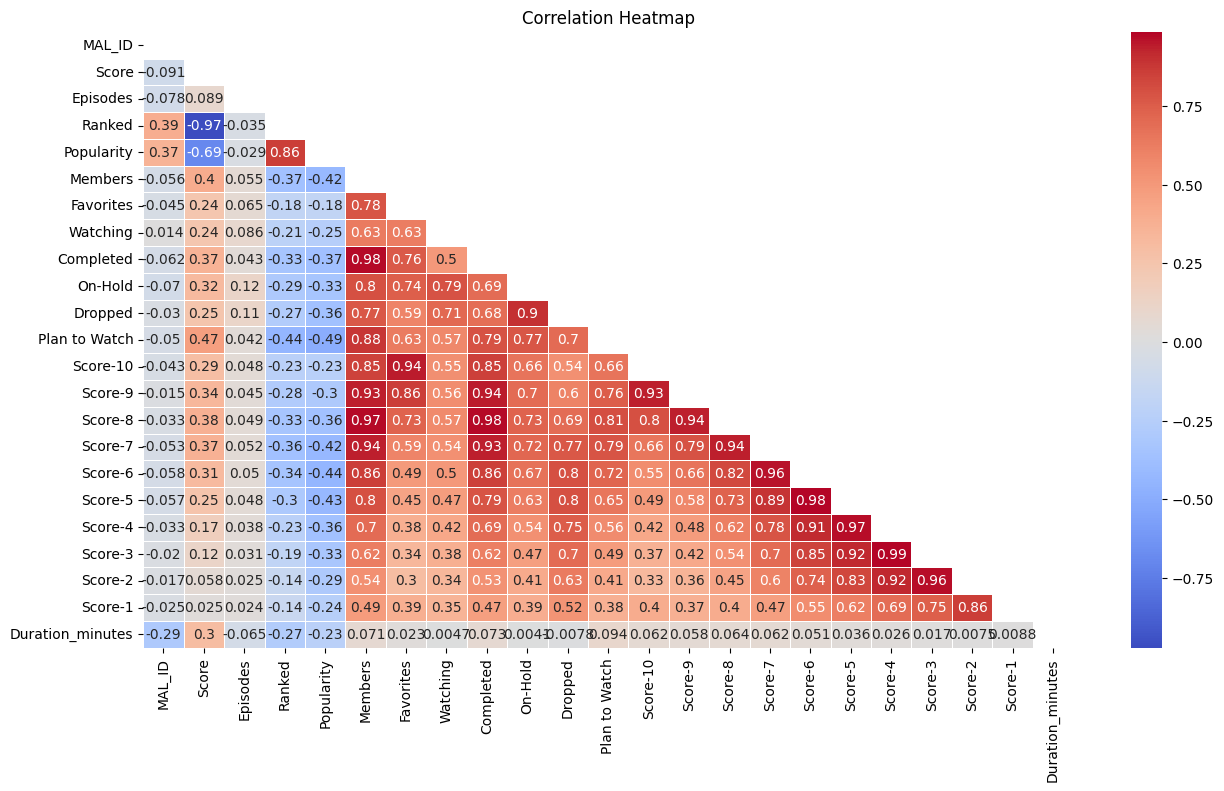

In [32]:
# Create a heatmap to look for correlations between numerical columns

# Get all numeric columns
numeric_columns = anime.select_dtypes(include=[np.number])

# Create a correlation matrix
cm = numeric_columns.corr()

# Create a mask to hide the upper part of the triangle
mask = np.triu(np.ones_like(cm, dtype=bool))

# Create a heatmap
plt.figure(figsize=(15,8))
sns.heatmap(cm, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

__Insights:__
There are quite a few cells that show strong correlations. Lets look more closely at them.
* Score was highly negatively correlated with ranking. This is because ranking is determined by the score (with the exception of rated R18+ not being included in rankings)
* Popularity and ranking are highly correlated. The higher the ranking the more likely people are to have seen it.
* Members and Completed are very highly correlated. It follows that the more people have completed the show, the more members have it on their list.
* It also follows that the more people have the show marked on their list, the more people will have it tagged as 'plan to watch' as well as a higher score of 6-10. It goes along with the idea that the higher scored shows would be watched or planned to watch.
* Favorites also is highly correlated with the higher score columns which is expected. So is completed.
* The score columns (1-10) tend to highly correlate with the numerical score column directly above and directly below them. For example score-9 highly correlates with score-8 and score-10 but not with score-4. This makes sense overall a show will score within a certain range.



### Consider doing a pairplot here
sns.pairplot(anime[['NumericColumn1', 'NumericColumn2', 'NumericColumn3']])
plt.show()

### Categorical Data


It's time to explore the categorical data

In [33]:
# Get Categorical Columns
categorical_columns = anime.select_dtypes(include=['object']).columns

In [34]:
anime[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17137 entries, 17548 to 17560
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Genres         17074 non-null  object
 1   Japanese name  17089 non-null  object
 2   Type           17101 non-null  object
 3   Aired          16855 non-null  object
 4   Premiered      4521 non-null   object
 5   Producers      9520 non-null   object
 6   Licensors      3843 non-null   object
 7   Studios        10152 non-null  object
 8   Source         13593 non-null  object
 9   Duration       16630 non-null  object
 10  Rating         16466 non-null  object
 11  Cleaned_Name   17137 non-null  object
 12  Name           17137 non-null  object
dtypes: object(13)
memory usage: 1.8+ MB


In [35]:
# Count unique categories
for column in categorical_columns:
    print(f"Value counts for '{column}':")
    print(anime[column].value_counts())
    print("\n")

Value counts for 'Genres':
Hentai                                  969
Music                                   783
Comedy                                  649
Kids                                    407
Kids, Music                             234
                                       ... 
Slice of Life, Parody                     1
Action, Magic, Mystery, Supernatural      1
Sci-Fi, Mystery, Thriller                 1
Fantasy, Josei, Sci-Fi                    1
Sci-Fi, Space, Vampire                    1
Name: Genres, Length: 4987, dtype: int64


Value counts for 'Japanese name':
ゲゲゲの鬼太郎                              6
ああっ女神さまっ                             4
로보카 폴리                               4
宇宙の騎士テッカマンブレード                       4
うっかりペネロペ                             4
                                    ..
アジテイテッド・スクリームズ・オブ・マゴッツ               1
モンストアニメ                              1
ネトラレヅマ                               1
LO Re：パコ すくすくみずきちゃん THE ANIMATION    1
ヤマノススメ Next Summit    

__Insights:__
   1. Some columns we can drop because they do not provide us useful informtion such as the the columns with names and the duration column.
   2. The aired and premiered columns also don't have a lot of values for each category.
  3. Some columns such as genres needs to be expanded because there are often more than one listed in each row.

In [36]:
anime = anime[anime['Type'] != 'Music']

In [38]:
# drop columns
reduced_cat_columns = categorical_columns.drop(['Name', 'Japanese name', 'Aired', 'Premiered', 'Duration'])
reduced_cat_columns_df = anime[reduced_cat_columns]
reduced_cat_columns_df

,Genres,Type,Producers,Licensors,Studios,Source,Rating,Cleaned_Name
1393,"Mystery, Police, Psychological, Supernatural, ...",TV,"VAP, Konami, Ashi Production, Nippon Televisio...",VIZ Media,Madhouse,Manga,R - 17+ (violence & profanity),Death Note
7449,"Action, Military, Mystery, Super Power, Drama,...",TV,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,R - 17+ (violence & profanity),Shingeki no Kyojin
3971,"Action, Military, Adventure, Comedy, Drama, Ma...",TV,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,R - 17+ (violence & profanity),Fullmetal Alchemist: Brotherhood
6614,"Action, Game, Adventure, Romance, Fantasy",TV,"Aniplex, Genco, DAX Production, ASCII Media Wo...",Aniplex of America,A-1 Pictures,Light novel,PG-13 - Teens 13 or older,Sword Art Online
10451,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",TV,"TV Tokyo, Bandai Visual, Lantis, Asatsu DK, Ba...",VIZ Media,Madhouse,Web manga,R - 17+ (violence & profanity),One Punch Man
...,...,...,...,...,...,...,...,...
17553,"Action, Mecha",TV,Bandai Spirits,NaN,Sunrise Beyond,Original,NaN,Kyoukai Senki
17558,"Comedy, Horror, Supernatural",TV,Kadokawa,NaN,Passione,Manga,NaN,Mieruko-chan
17561,"Action, Fantasy",TV,Bandai Namco Arts,NaN,Sunrise,Game,NaN,Scarlet Nexus
17555,"Sci-Fi, Space, Vampire",TV,Bandai Namco Arts,NaN,Arvo Animation,Light novel,NaN,Tsuki to Laika to Nosferatu


In [39]:
# Make a copy of reduced_cat_columns_df
exploded_cat_df = reduced_cat_columns_df.copy()
# Split the comma seperated values in the cells
exploded_cat_df['Genres'] = exploded_cat_df['Genres'].str.split(', ')
exploded_cat_df['Producers'] = exploded_cat_df['Producers'].str.split(', ')
exploded_cat_df['Licensors'] = exploded_cat_df['Licensors'].str.split(', ')

# Explode and create value counts
genre_val_counts = exploded_cat_df['Genres'].explode().value_counts()
producers_val_counts = exploded_cat_df['Producers'].explode().value_counts()
licensors_val_counts = exploded_cat_df['Licensors'].explode().value_counts()

# Value Counts for other columns
type_val_counts = reduced_cat_columns_df['Type'].value_counts()
studios_val_counts = reduced_cat_columns_df['Studios'].value_counts()
source_val_counts = reduced_cat_columns_df['Source'].value_counts()
rating_val_counts = reduced_cat_columns_df['Rating'].value_counts()

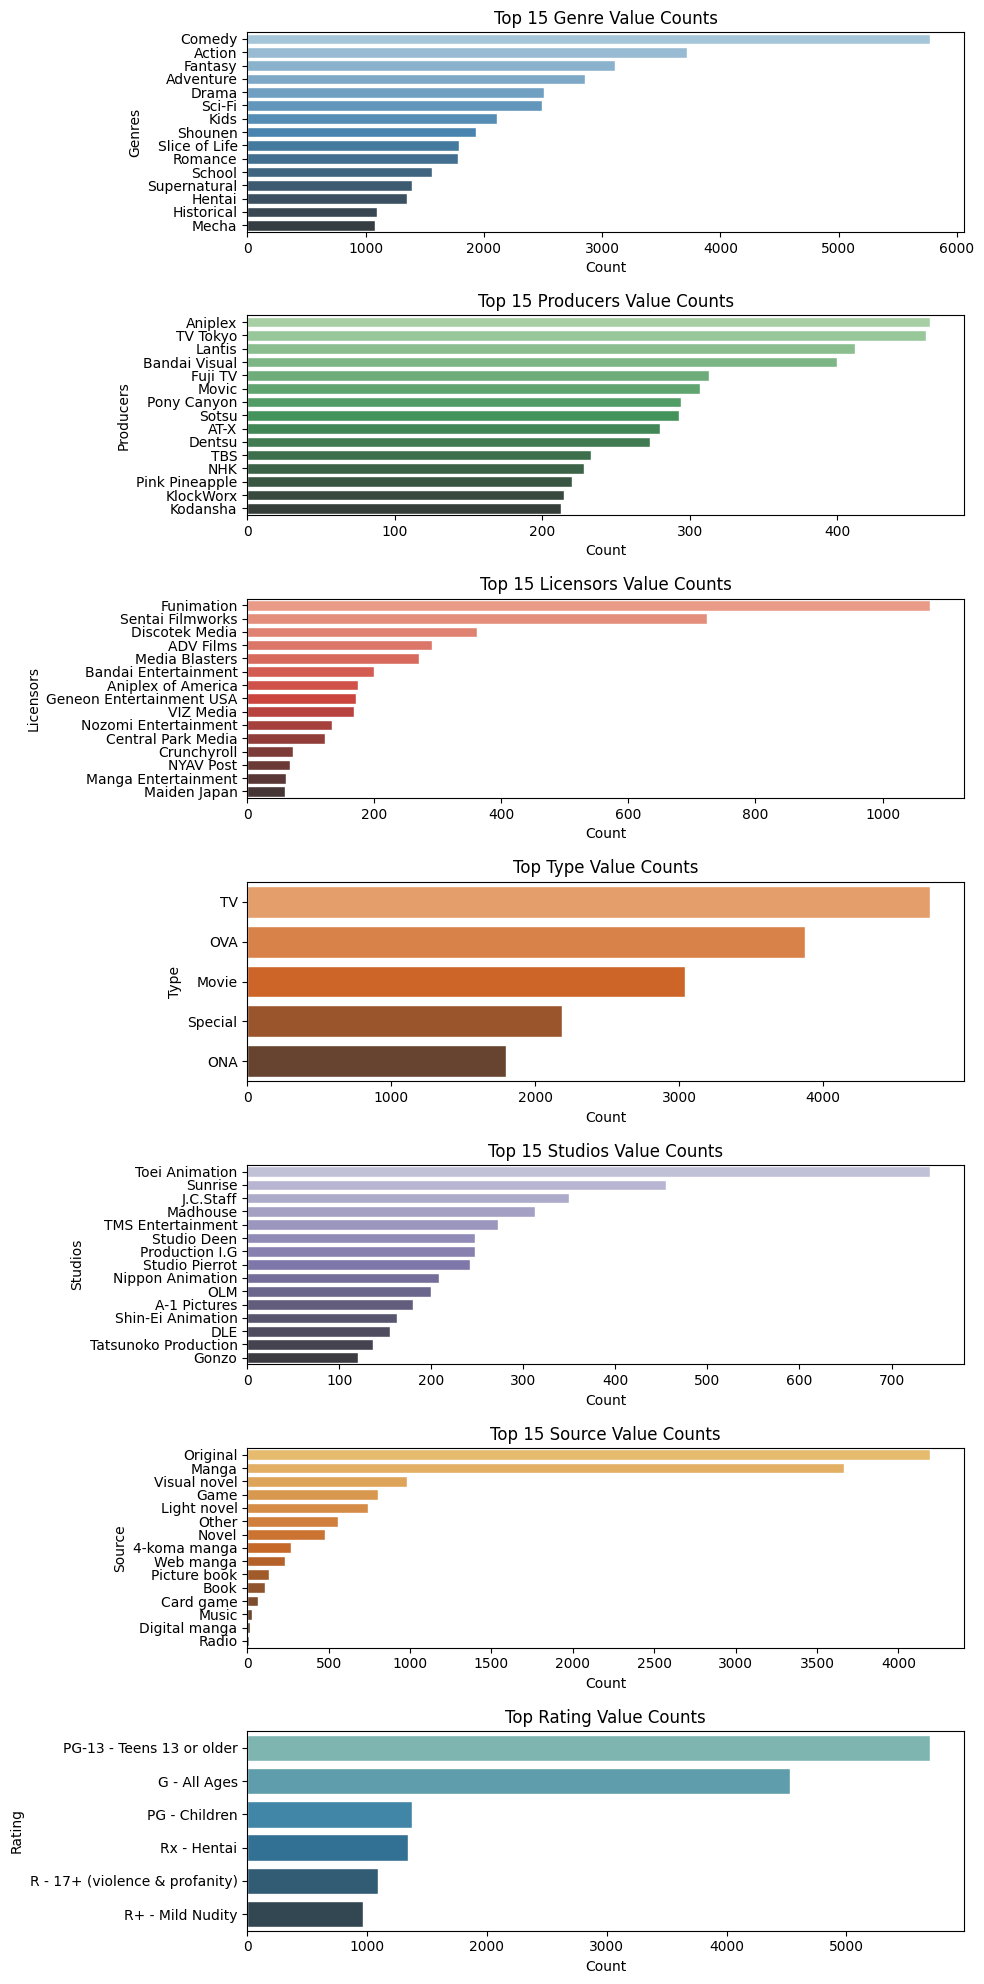

In [40]:
# Define the top 15 values and their corresponding counts
top_data = [
    (genre_val_counts.head(15), 'Top 15 Genre Value Counts', 'Genres', 'Blues_d'),
    (producers_val_counts.head(15), 'Top 15 Producers Value Counts', 'Producers', 'Greens_d'),
    (licensors_val_counts.head(15), 'Top 15 Licensors Value Counts', 'Licensors', 'Reds_d'),
    (type_val_counts.head(15), 'Top Type Value Counts', 'Type', 'Oranges_d'),
    (studios_val_counts.head(15), 'Top 15 Studios Value Counts', 'Studios', 'Purples_d'),
    (source_val_counts.head(15), 'Top 15 Source Value Counts', 'Source', 'YlOrBr_d'),
    (rating_val_counts.head(15), 'Top Rating Value Counts', 'Rating', 'YlGnBu_d')
]

# Create subplots
fig, axes = plt.subplots(len(top_data), 1, figsize=(10, 20))

# Customize Seaborn style
sns.set(style="whitegrid")

# Create and customize subplots for each category
for i, (data, title, xlabel, palette) in enumerate(top_data):
    sns.barplot(x=data.values, y=data.index, ax=axes[i], palette=palette)
    axes[i].set_title(title)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(xlabel)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()



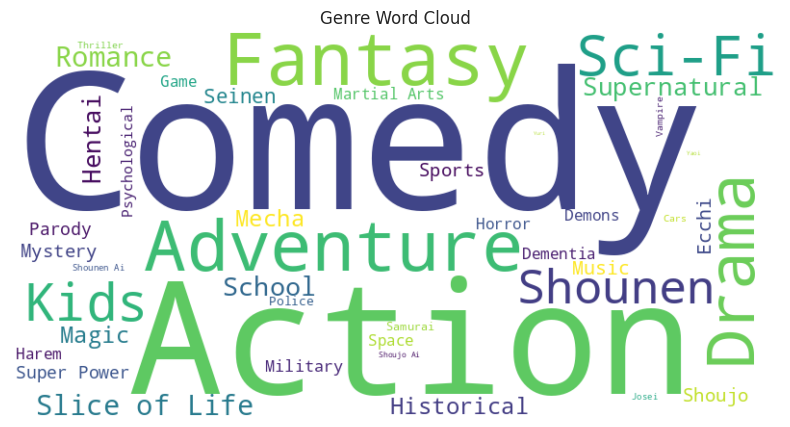

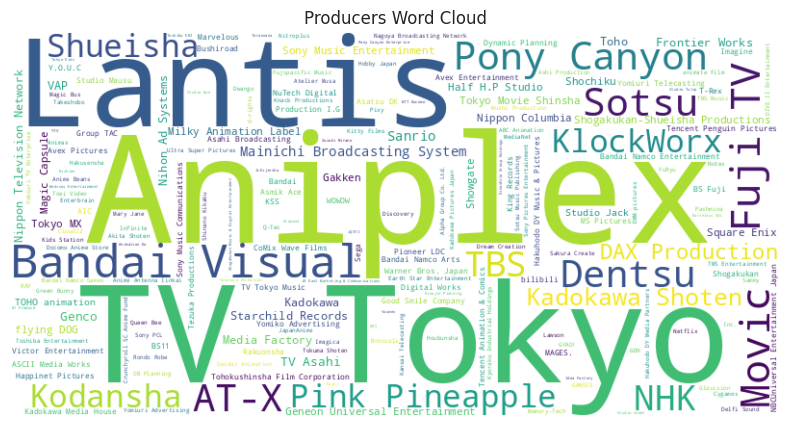

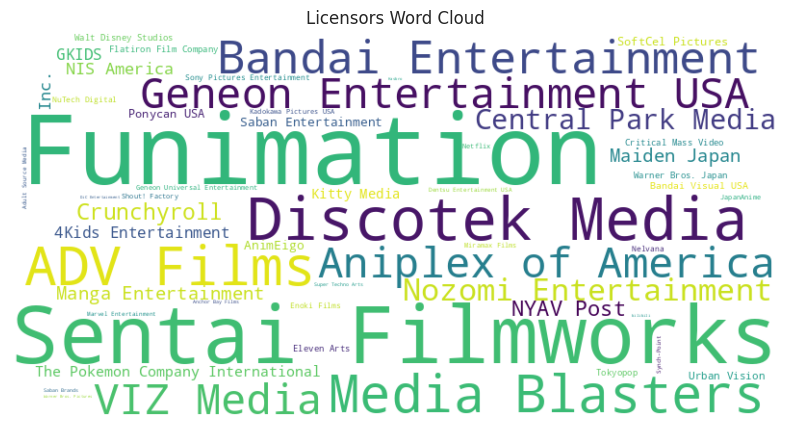

In [41]:
from wordcloud import WordCloud

# Create a WordCloud object with common settings
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Create word clouds for Genres, Producers, and Licensors
def create_wordcloud(data, title):
    # Convert the data (value counts) to a dictionary
    data_dict = data.to_dict()

    # Generate the word cloud from the data
    wordcloud.generate_from_frequencies(data_dict)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Create word clouds for Genres, Producers, and Licensors
create_wordcloud(genre_val_counts, 'Genre Word Cloud')
create_wordcloud(producers_val_counts, 'Producers Word Cloud')
create_wordcloud(licensors_val_counts, 'Licensors Word Cloud')

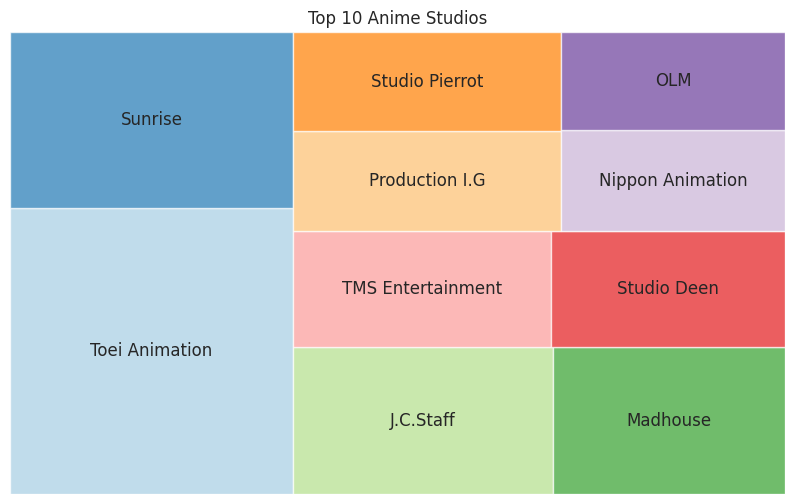

In [42]:
!pip install squarify
import squarify

# Data for anime studios
studios = studios_val_counts.head(10).index
studio_counts = studios_val_counts.head(10).values

# Create a tree diagram
plt.figure(figsize=(10, 6))
colors = plt.cm.Paired(range(len(studios)))
squarify.plot(sizes=studio_counts, label=studios, color=colors, alpha=0.7)
plt.axis('off')
plt.title('Top 10 Anime Studios')
plt.show()

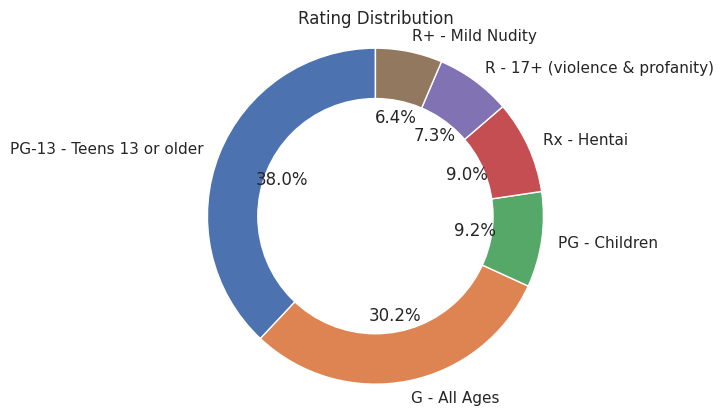

In [43]:
rating_counts = rating_val_counts.values
ratings = rating_val_counts.index

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(rating_counts, labels=ratings, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4, edgecolor='w'))

# Draw a circle in the center (donut hole)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title('Rating Distribution')
plt.show()

## Rating Dataset EDA

In [44]:
rating.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


In [45]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


In [46]:
rating.describe()

,user_id,anime_id,rating
count,5.763328e+07,5.763328e+07,5.763328e+07
mean,1.768878e+05,1.583147e+04,7.510789e+00
std,1.020117e+05,1.326114e+04,1.697722e+00
min,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.827800e+04,3.091000e+03,7.000000e+00
50%,1.772910e+05,1.188700e+04,8.000000e+00
75%,2.654190e+05,2.899900e+04,9.000000e+00
max,3.534040e+05,4.845600e+04,1.000000e+01


In [47]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [48]:
rating.user_id.value_counts().describe()

count    310059.000000
mean        185.878423
std         255.290522
min           1.000000
25%          43.000000
50%         113.000000
75%         238.000000
max       15455.000000
Name: user_id, dtype: float64

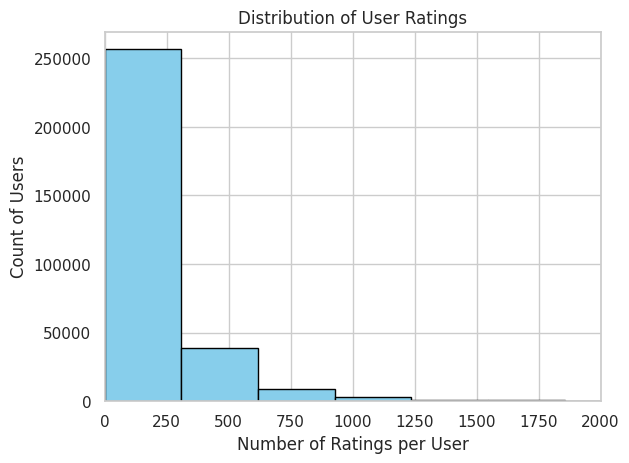

In [49]:
user_id_counts = rating['user_id'].value_counts()

# Create a histogram
plt.hist(user_id_counts, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Count of Users')
plt.title('Distribution of User Ratings')

plt.xlim(0, 2000)

plt.show()

Filter out users that have not rated very many anime and users that have rated too many anime (potentially spam accounts).
We can drop people who have only rated 3 or fewer anime and users who have rated more than 300.
Less than 3 anime seems like it won't give us very much info and is way below our first quarter mark of 43.
More than 300 seems extreme and is still over our third quarter mark of 238.


In [50]:
# Let's see what we will be dropping
lower = rating.user_id.value_counts() < 3
upper = rating.user_id.value_counts() > 300
print(f'lower amount to drop {lower[lower].shape}, upper amount to drop {upper[upper].shape} out of {rating.user_id.value_counts().shape}')

lower amount to drop (9865,), upper amount to drop (56253,) out of (310059,)


In [51]:
print(upper)

189037     True
162615     True
68042      True
283786     True
259790     True
          ...  
201316    False
201300    False
97555     False
201293    False
137466    False
Name: user_id, Length: 310059, dtype: bool


In [52]:
# Filter out all ratings that are above and below the set threshold
upper_index = upper[upper].index
lower_index = lower[lower].index
ratings = rating[~rating['user_id'].isin(upper_index) & ~rating['user_id'].isin(lower_index)]
print(f'original shape: {rating.shape} \n new shape: {ratings.shape}')

original shape: (57633278, 3) 
 new shape: (25812536, 3)


In [53]:
ratings.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


In [54]:
ratings.describe()

,user_id,anime_id,rating
count,2.581254e+07,2.581254e+07,2.581254e+07
mean,1.764255e+05,1.496663e+04,7.786135e+00
std,1.017699e+05,1.318319e+04,1.633077e+00
min,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.842700e+04,2.251000e+03,7.000000e+00
50%,1.762160e+05,1.106100e+04,8.000000e+00
75%,2.642620e+05,2.817100e+04,9.000000e+00
max,3.534040e+05,4.845600e+04,1.000000e+01


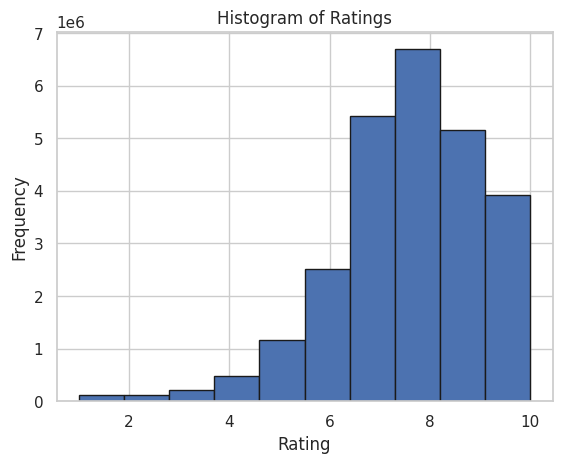

In [55]:
from matplotlib.ticker import ScalarFormatter

plt.hist(ratings['rating'], bins=10, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

# Get the current y-axis formatter
y_formatter = ScalarFormatter(useOffset=False)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(y_formatter)

plt.show()

In [56]:
ratings.head(2)

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5


In [57]:
anime.head(2)

,MAL_ID,Score,Genres,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,...,Score-5,Score-4,Score-3,Score-2,Score-1,Aired_Start,Aired_End,Duration_minutes,Cleaned_Name,Name
1393,1535,8.63,"Mystery, Police, Psychological, Supernatural, ...",デスノート,TV,37.0,"Oct 4, 2006 to Jun 27, 2007",Fall 2006,"VAP, Konami, Ashi Production, Nippon Televisio...",VIZ Media,...,28048.0,10462.0,3692.0,2256.0,3586.0,2006-10-04,2007-06-27,23.0,Death Note,Death Note
7449,16498,8.48,"Action, Military, Mystery, Super Power, Drama,...",進撃の巨人,TV,25.0,"Apr 7, 2013 to Sep 29, 2013",Spring 2013,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,...,31141.0,11805.0,4637.0,2707.0,4939.0,2013-04-07,2013-09-29,24.0,Shingeki no Kyojin,Attack on Titan


In [58]:
ratings['MAL_ID'] = ratings.anime_id
ratings.head()

<ipython-input-58-6b01b4422494>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings['MAL_ID'] = ratings.anime_id


,user_id,anime_id,rating,MAL_ID
0,0,430,9,430
1,0,1004,5,1004
2,0,3010,7,3010
3,0,570,7,570
4,0,2762,9,2762


In [59]:
ratings.drop(['anime_id'], axis=1, inplace=True)
ratings.head()

<ipython-input-59-c4f560fa21c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratings.drop(['anime_id'], axis=1, inplace=True)


,user_id,rating,MAL_ID
0,0,9,430
1,0,5,1004
2,0,7,3010
3,0,7,570
4,0,9,2762


In [60]:
anime_ratings = ratings.merge(anime, on='MAL_ID')
anime_ratings.head()

,user_id,rating,MAL_ID,Score,Genres,Japanese name,Type,Episodes,Aired,Premiered,...,Score-5,Score-4,Score-3,Score-2,Score-1,Aired_Start,Aired_End,Duration_minutes,Cleaned_Name,Name
0,0,9,430,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,"Jul 23, 2005",NaN,...,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0,Fullmetal Alchemist: The Conqueror of Shamballa,Fullmetal Alchemist:The Movie - Conqueror of S...
1,18,10,430,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,"Jul 23, 2005",NaN,...,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0,Fullmetal Alchemist: The Conqueror of Shamballa,Fullmetal Alchemist:The Movie - Conqueror of S...
2,33,4,430,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,"Jul 23, 2005",NaN,...,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0,Fullmetal Alchemist: The Conqueror of Shamballa,Fullmetal Alchemist:The Movie - Conqueror of S...
3,41,7,430,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,"Jul 23, 2005",NaN,...,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0,Fullmetal Alchemist: The Conqueror of Shamballa,Fullmetal Alchemist:The Movie - Conqueror of S...
4,52,10,430,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,"Jul 23, 2005",NaN,...,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0,Fullmetal Alchemist: The Conqueror of Shamballa,Fullmetal Alchemist:The Movie - Conqueror of S...


In [61]:
anime_ratings.shape

(24530930, 40)

In [63]:
anime_ratings.dropna(subset=['Score'], inplace=True)
anime_ratings.head()

,user_id,rating,MAL_ID,Score,Genres,Japanese name,Type,Episodes,Aired,Premiered,...,Score-5,Score-4,Score-3,Score-2,Score-1,Aired_Start,Aired_End,Duration_minutes,Cleaned_Name,Name
0,0,9,430,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,"Jul 23, 2005",NaN,...,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0,Fullmetal Alchemist: The Conqueror of Shamballa,Fullmetal Alchemist:The Movie - Conqueror of S...
1,18,10,430,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,"Jul 23, 2005",NaN,...,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0,Fullmetal Alchemist: The Conqueror of Shamballa,Fullmetal Alchemist:The Movie - Conqueror of S...
2,33,4,430,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,"Jul 23, 2005",NaN,...,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0,Fullmetal Alchemist: The Conqueror of Shamballa,Fullmetal Alchemist:The Movie - Conqueror of S...
3,41,7,430,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,"Jul 23, 2005",NaN,...,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0,Fullmetal Alchemist: The Conqueror of Shamballa,Fullmetal Alchemist:The Movie - Conqueror of S...
4,52,10,430,7.57,"Military, Comedy, Historical, Drama, Fantasy, ...",劇場版 鋼の錬金術師 シャンバラを征く者,Movie,1.0,"Jul 23, 2005",NaN,...,8777.0,4298.0,1555.0,812.0,490.0,2005-07-23,NaT,105.0,Fullmetal Alchemist: The Conqueror of Shamballa,Fullmetal Alchemist:The Movie - Conqueror of S...


In [64]:
modeling_data = anime_ratings[['user_id', 'MAL_ID', 'rating', 'Name', 'Genres', 'Popularity']].copy()
modeling_data.to_csv('/content/drive/My Drive/anime_project/modeling_df.csv', index=False)